
===== TABLEAU : Nombre total et nombre par bande de fréquence =====

Bande de fréquences         Total  2,6 GHz TDD  26 GHz  3,8 GHz
Région                                                         
Auvergne-Rhône-Alpes            8            2       0        6
Bourgogne-Franche-Comté         1            1       0        0
Bretagne                       17            4       0       13
Centre-Val de Loire             3            0       0        3
Grand Est                       4            1       0        3
Guadeloupe                      1            1       0        0
Guyane                          1            1       0        0
Hauts-de-France                 5            0       0        5
Normandie                       7            2       0        5
Occitanie                      10            2       0        8
Pays de la Loire                6            2       0        4
Provence-Alpes-Côte d'Azur      9            2       0        7
Île-de-France                  44 

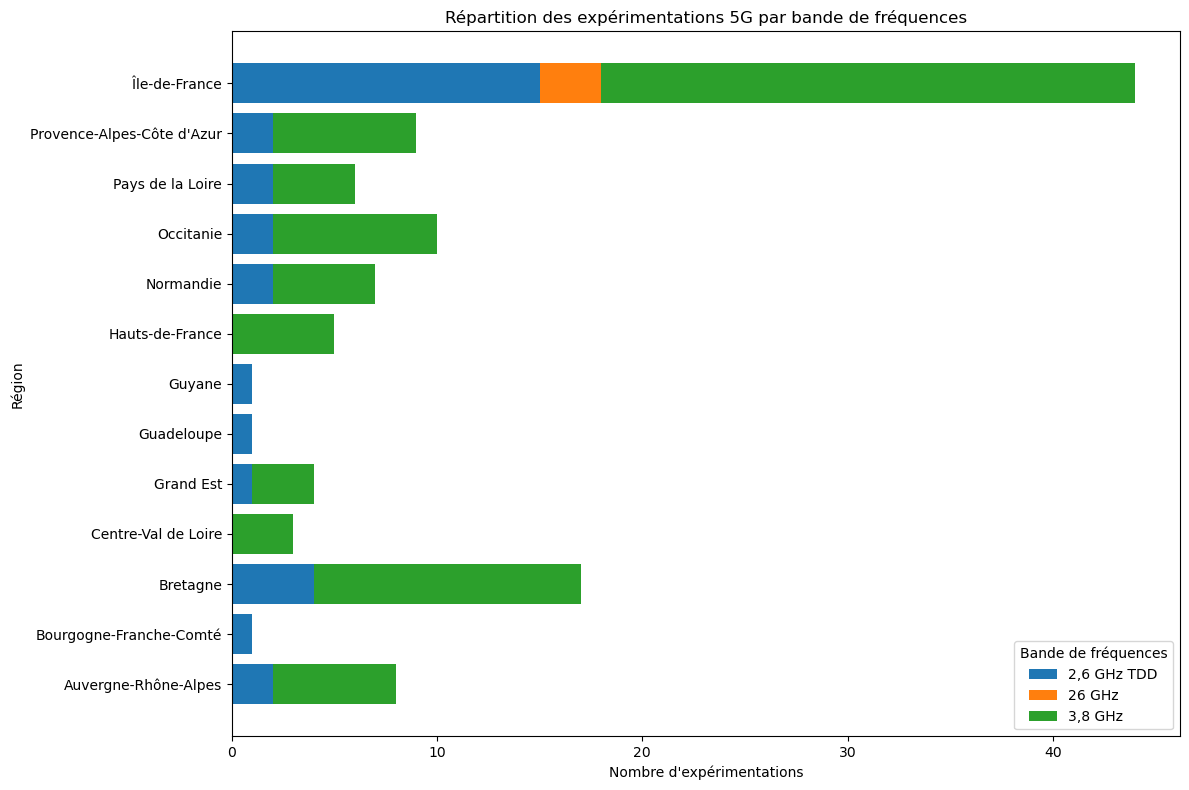

In [1]:
import pandas as pd                     #import de pandas pour manipuler les données
import matplotlib.pyplot as plt         #import de matplotlib pour tracer les graphiques

#1.nettoyage du fichier csv

donnees = pd.read_csv(                  #lecture du fichier CSV contenant les expérimentations
    "experimentations_5G.csv",          #nom du fichier CSV
    sep=";",                            #séparateur utilisé dans le fichier
    encoding="cp1252",                  #encodage utilisé (format Windows)
    quotechar='"'                       #caractère délimitant les chaînes de texte
)

donnees.columns = [c.strip() for c in donnees.columns]#suppression des espaces autour des noms de colonnes

for colonne in donnees.select_dtypes(include="object"):#parcours de toutes les colonnes contenant du texte
    donnees[colonne] = donnees[colonne].astype(str).str.strip()#suppression des espaces dans les valeurs

colonne_region = "Région"              
colonne_technologie = "Bande de fréquences"

#2.tableau

tableau = pd.crosstab(                  #création d’un tableau croisé (une ligne par région)
    donnees[colonne_region],            #lignes = régions
    donnees[colonne_technologie]        #colonnes = technologies (bandes de fréquences)
)

tableau["Total"] = tableau.sum(axis=1)  #ajout d’une colonne contenant le total par région

colonnes_ordre = ["Total"] + [c for c in tableau.columns if c != "Total"]   #placement de "Total" en première colonne
tableau = tableau[colonnes_ordre]        #réorganisation du tableau

print("\n===== TABLEAU : Nombre total et nombre par bande de fréquence =====\n")
print(tableau)                           #affichage du tableau dans la console

#3.graphique

plt.figure(figsize=(12, 8))              #définition de la taille du graphique

base_empilement = None                   #variable qui sert de base pour empiler les barres

for technologie in tableau.columns:       #parcours de toutes les colonnes du tableau
    if technologie == "Total":            #on ne trace pas la colonne "Total"
        continue

    if base_empilement is None:           #si c'est la première bande de fréquence
        plt.barh(
            tableau.index,                #axe des régions
            tableau[technologie],         #valeur à tracer
            label=technologie             #nom affiché dans la légende
        )
        base_empilement = tableau[technologie].copy()   #initialisation de la base d’empilement
    else:                                 #si ce n’est pas la première bande
        plt.barh(
            tableau.index,                #axe des régions
            tableau[technologie],         #valeur de la bande actuelle
            left=base_empilement,         #empilement à gauche
            label=technologie             #nom affiché dans la légende
        )
        base_empilement += tableau[technologie]#mise à jour de la base d’empilement

plt.xlabel("Nombre d'expérimentations")              
plt.ylabel("Région")                                   
plt.title("Répartition des expérimentations 5G par bande de fréquences")

plt.legend(title="Bande de fréquences")
plt.tight_layout()#ajustement automatique des marges
plt.show()                                        
